<a href="https://colab.research.google.com/github/ishandahal/ml_model_evaluation/blob/main/Confidence_intervals_and_Resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Holdout methond and repeated sampling.
- Demonstrating the bias and variance on different sizes of test set and training set. 
- If the test set is too small the estimate of the generalization performance will have a larger variance. 
- On the other hand if the test set is too large, the performance of the model has a pesimistic bias assuming that we train the model with the entire set of data. 

In [ ]:
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = iris_data()

clf_1 = KNeighborsClassifier(n_neighbors=3,
                             weights='uniform',
                             algorithm='kd_tree',
                             leaf_size=30,
                             p=2,
                             metric='minkowski',
                             metric_params=None,
                             n_jobs=1)

### Large test set <=> small training set

In [ ]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []

for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.5, random_state=i, stratify=y)
    y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
    y_pred_i_acc = np.mean(y_test == y_pred_i)
    pred_2.append(y_pred_i_acc)

pred_2 = np.asarray(pred_2)
print(f"Average: {pred_2.mean()*100:.2f}")

Average: 95.41


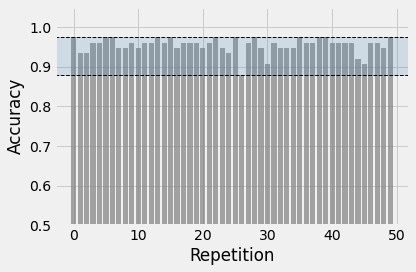

In [ ]:
with plt.style.context(('fivethirtyeight')):
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1.05])
    plt.tight_layout()
    plt.show()

### Small test set <=> Larger training set

In [ ]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []

for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.1, random_state=i, stratify=y)
    y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
    y_pred_i_acc = np.mean(y_test == y_pred_i)
    pred_2.append(y_pred_i_acc)

pred_2 = np.asarray(pred_2)
print(f"Average: {pred_2.mean()*100:.2f}")

Average: 96.13


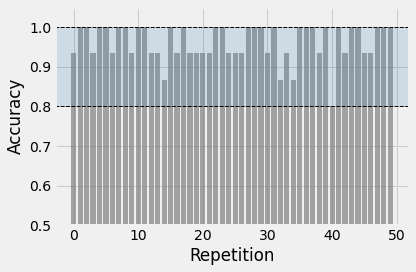

In [ ]:
with plt.style.context(('fivethirtyeight')):
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1.05])
    plt.tight_layout()
    plt.show()

### Pessimistic Bias in the HoldOut
- Experiment showing the pessimistic bias of the generalization performance estimates using learning curves. 
- Same test set is used while the training size differs

In [ ]:
from mlxtend.data import mnist_data
from sklearn.model_selection import train_test_split

X2, y2 = mnist_data()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,
                                                        test_size=0.3,
                                                        random_state=12,
                                                        stratify=y2)
print('Number of train examples:', y_train2.shape[0])
print('Number of test examples:', y_test2.shape[0])
print('Labels:', y_train2)

Number of train examples: 3500
Number of test examples: 1500
Labels: [8 8 7 ... 6 9 8]


In [ ]:
from sklearn.linear_model import LogisticRegression

clf_2 = LogisticRegression(C=0.000001,
                           random_state=12,
                           max_iter=1000,
                           multi_class='multinomial',
                           n_jobs=1)
pred_train, pred_test = [], []

intervals = np.arange(500, X_train2.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train2[:i], y_train2[:i])
    p_train = clf_2.score(X_train2[:i], y_train2[:i])
    p_test = clf_2.score(X_test2, y_test2)
    pred_train.append(p_train)
    pred_test.append(p_test)



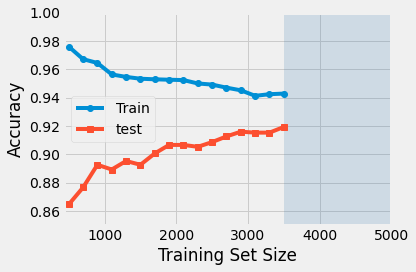

In [ ]:
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label="Train")
    plt.plot(intervals, pred_test, marker='s', label='test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([430, X_train2.shape[0] + X_test2.shape[0]])
    plt.axvspan(X_train2.shape[0],
                X_train2.shape[0] + X_test2.shape[0],
                alpha=0.2,
                color='steelblue')
    plt.ylim([0.85, 1.0])
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.tight_layout()

##### From looking at the above graph the mdoel is likely benefitting from more training data

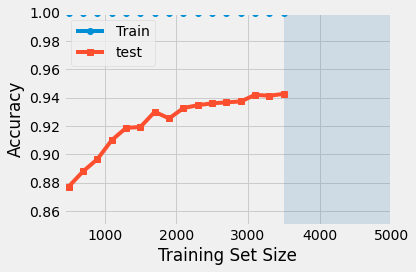

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_2 = RandomForestClassifier(n_estimators=100, random_state=123)

pred_train, pred_test = [], []

intervals = np.arange(500, X_train2.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train2[:i], y_train2[:i])
    p_train = clf_2.score(X_train2[:i], y_train2[:i])
    p_test = clf_2.score(X_test2, y_test2)
    pred_train.append(p_train)
    pred_test.append(p_test)

with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label="Train")
    plt.plot(intervals, pred_test, marker='s', label='test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([430, X_train2.shape[0] + X_test2.shape[0]])
    plt.axvspan(X_train2.shape[0],
                X_train2.shape[0] + X_test2.shape[0],
                alpha=0.2,
                color='steelblue')
    plt.ylim([0.85, 1.0])
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.tight_layout()

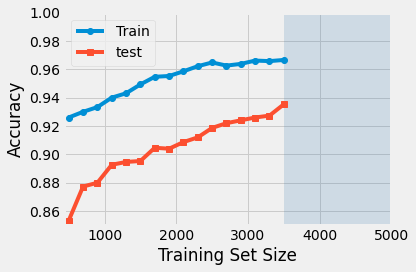

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf_2 = KNeighborsClassifier(n_neighbors=3)

pred_train, pred_test = [], []

intervals = np.arange(500, X_train2.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train2[:i], y_train2[:i])
    p_train = clf_2.score(X_train2[:i], y_train2[:i])
    p_test = clf_2.score(X_test2, y_test2)
    pred_train.append(p_train)
    pred_test.append(p_test)

with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label="Train")
    plt.plot(intervals, pred_test, marker='s', label='test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([430, X_train2.shape[0] + X_test2.shape[0]])
    plt.axvspan(X_train2.shape[0],
                X_train2.shape[0] + X_test2.shape[0],
                alpha=0.2,
                color='steelblue')
    plt.ylim([0.85, 1.0])
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.tight_layout()